## Intro to Machine Learning Tutorial 1:
### Python Crash Course
#### 1 What is Python?
+ Special Syntactical Properties

#### 2 Basics
+ Types (string, numbers), Variables, Casting
+ Loops
+ Control Statements
+ Functions (passing)
+ Classes

#### 3 List/Dicts Operations
+ Slicing
+ List Comprehensions

### Lecture Specific Content
#### 4 Libraries
+ Imports generally
+ Numpy 
+ Pandas
+ SKlearn


### 1 What is Python?
+ Interpreted Multi-paradigm: functional, 
 imperative, object-oriented, structured, reflective. 
+ Dynamically strong typed (Duck typing): 
 In duck typing, an object's suitability is determined by the presence of certain methods and properties, 
 rather than the type of the object itself.
+ Other notable properties: GIL (global intepreter lock), Garbage Collection
+ Python is very resilient to 'bad code'. GIL wir try to execute anything you give it, for example python will compare string and integer!

#### Special Syntactical Properties
+ No semicolon at end of statement required
+ No brackets requried (unless for logical operations), identation determines scope
+ There is no switch control statement, but workarounds exists

### 2 Basics
#### Types, Variables, Casting


In [1]:
# 2.1 Numerical Types
# Implicit casts
a, b = 1, 2 
c = a/b
print(c, type(c)) # prints 0.5, implicit cast to float

# Explicit casts, rounding behaviour
a, b = 1.0, 2.0 
c = a/b
print(int(c), type(int(c))) # prints 0, rounding by truncation

# Cast to string
print(str(c), type(str(c)))

print('\n-------------------------\n')

# 2.2. String type (single or double quotes)
a_string = "'Peter says: 'i like milk and coffee'"
b_string = '"Peter says: "i like cookies and coffee"'
a_char = 'c'
print(type(a_string), type(a_char))

# Replace
print(len(a_string))
a_string = a_string.replace('milk', 'cookies').replace("'", '"')
print(a_string)

# Compare
print(a_string == b_string)
print(a_string is b_string)

# Search
index = a_string.find("c") #returns index of first occurance or -1
print(index)
 
# Slicing (more details on this later)
cookies = a_string[index:index+7] # [from:to]
print(cookies)

# Concatenation
chocolate = 'choc' + 'olate'
print(chocolate)

# Insertion
insert_me = ', ' + chocolate
a_string = a_string[:index+7]+insert_me + a_string[index+7:]
print(a_string)

0.5 <class 'float'>
0 <class 'int'>
0.5 <class 'str'>

-------------------------

<class 'str'> <class 'str'>
37
"Peter says: "i like cookies and coffee"
True
False
21
cookies
chocolate
"Peter says: "i like cookies, chocolate and coffee"


In [161]:
# Examples of the danger of python:
# You can modify instances at runtime
class A:
    def __init__(self):
        self.a = 'a'
        
    def foo(self):
        print("foo")

a = A()
a.__dict__['b'] = 'b'
print(a.b)

a.foo()
a.__dict__['foo'] = lambda : print('not foo anymore')
a.foo()

# You can do anything:
print = lambda x : display('my print: {}'.format(x))

# You can compare anything:
if not ():
    print("hello")
    
if 1 and 'two':
    print("a")



'my print: b'

'my print: foo'

'my print: not foo anymore'

'my print: hello'

'my print: a'

[1, 2, 2, 5, 6, 7, 8, 8]

In [103]:
# 2.3 Immutable (simple) types:
# All the variables that refer to it will always see the same value, 
# but operations that transform that value into a new value always return a new object.
# Example: int, float, etc

a, b, c = 1, 2, 3
print(a, b, c, hex(id(a)), hex(id(b)), hex(id(c))) # 3 Different memory adresses

b = a
print(a, b, c, hex(id(a)), hex(id(b)), hex(id(c))) # a and b now refer to same object

b = 99 
print(a, b, c, hex(id(a)), hex(id(b)), hex(id(c))) # Memory adress of b changes but that of a doesnt

1 2 3 0x5647ad086300 0x5647ad086320 0x5647ad086340
1 1 3 0x5647ad086300 0x5647ad086300 0x5647ad086340
1 99 3 0x5647ad086300 0x5647ad086f40 0x5647ad086340


In [104]:
# 2.4 Mutable (complex) types:
# We can use some specific operations to mutate it and all the variables 
# that refer to it will see the change.
# Example: string, list, dict, any other object
      
a_list, b_list, c_list = [1], [2], [3]
print(a_list, b_list, c_list, 
      hex(id(a_list)), hex(id(b_list)), hex(id(c_list))) # 3 Different memory adresses

b_list = a_list
print(a_list, b_list, c_list, 
      hex(id(a_list)), hex(id(b_list)), hex(id(c_list))) # a_list and b_list now refer to same object

b_list[0] = 99
print(a_list, b_list, c_list, 
      hex(id(a_list)), hex(id(b_list)), hex(id(c_list))) # Memory adress of b_list stays the same

c_list[0] = a_list[0]
print(a_list, b_list, c_list, 
      hex(id(a_list)), hex(id(b_list)), hex(id(c_list))) # Memory adress of c_list stays the same

[1] [2] [3] 0x7fbdfa86c730 0x7fbdfa86c870 0x7fbdfa8727d0
[1] [1] [3] 0x7fbdfa86c730 0x7fbdfa86c730 0x7fbdfa8727d0
[99] [99] [3] 0x7fbdfa86c730 0x7fbdfa86c730 0x7fbdfa8727d0
[99] [99] [99] 0x7fbdfa86c730 0x7fbdfa86c730 0x7fbdfa8727d0


#### Loops


In [1]:
# 2.6 Loops
# Range based
start, stop, step = 0,10,5
for i in range(start, stop, step):
    print(i)
print('\n-------------------------\n')    

# Iterator
mylist = ['a,b', 'c,d', 'e,f']
for i in mylist:
    print(i)
print('\n-------------------------\n')    

# Enumerative iterator
mylist = ['a,b', 'c,d', 'e,f']
for i, value in enumerate(mylist):
    print(i, value)
print('\n-------------------------\n')    

# Stacked:
for i, value in enumerate(mylist):
    for j in value: #value is a string which can be iterated like a list
        print(j)
print('\n-------------------------\n')    

# Break/continue:        
for i in range(start, stop, step):
    if i < stop-step:
        print('continue')
        continue
    elif i == start+step:
        print('break')
        break
    
print('\n-------------------------\n')    
# While:
x = []
while lambda x : len(x) < 5: #Note you can use any boolean function in the loop head as well.
    x.append('y')
print(x)

0
5

-------------------------

a,b
c,d
e,f

-------------------------

0 a,b
1 c,d
2 e,f

-------------------------

a
,
b
c
,
d
e
,
f

-------------------------

continue
break

-------------------------



KeyboardInterrupt: 

#### Control Statements


In [2]:
# 2.7 Control Statements
x = 5
if 0 < x < 5:
    print('do some general stuff')
elif x == 0 and x == 5 or x is not None:
    print('handle edge case')
else:
    print('this should not happen - consider raising and error')
    
print('\n-------------------------\n')
# Evaluation order of multiple conditions
# is always from left to right unless specified otherwise.
# Evaluation stopped if logical expression cant evaluate different anymore.
# Logical priorization can be done via brackets ()

def cond_a():
    print('cond_a')
    return True

def cond_b():
    print('cond_b')
    return False

def cond_c():
    print('cond_c')
    return True

if cond_a() and cond_b() and cond_c():
    pass
print('\n-------------------------\n')

if cond_a() and cond_b() or cond_c():
    pass

print('\n-------------------------\n')
if (cond_a() or cond_b()) and cond_c():
    pass

print('\n-------------------------\n')

# Testing for object identity and/or values:
x = [1, 2, 3]
y = x
print(x is y, x==y, hex(id(x)), hex(id(y)))

y = [1, 2, 3]
print(x is y, x==y, hex(id(x)), hex(id(y)))

handle edge case

-------------------------

cond_a
cond_b

-------------------------

cond_a
cond_b
cond_c

-------------------------

cond_a

-------------------------

True True 0x7f98e45805a0 0x7f98e45805a0
False True 0x7f98e45805a0 0x7f98e45112d0


#### Functions

In [82]:
# 2.8 Functions
# Syntax and Scope
x = 5
def f(z):
    print('yes, this works, x+z=', x+z)
f(1)

def f(z):
    y = 5
    print('x+y=', x+y)
f(1)
#print(y) #This doesnt

print('\n-------------------------\n')

# Multiple return statements
def f_multi():
    return 1,2,3
a, b, c = f_multi() # unpacked return
print(a,b,c)
abcd = f_multi() # packed return
a, b, c = [*abcd] # unpack packed return
print(a,b,c)

print('\n-------------------------\n')

# Argument passing and return values
def f_immutable(x, y):
    print('inside function',x, y, 
        hex(id(x)), hex(id(y)))
    x = y
    print('inside function', x, y, 
        hex(id(x)), hex(id(y)))
    return x, y 
    
def f_mutable(x, y):
    print('inside function',x, y, 
        hex(id(x)), hex(id(y)))
    x[0] = y[0]
    print('inside function',x, y, 
        hex(id(x)), hex(id(y)))
    return x, y

a, b = 1, 2
print('out of function', a, b, 
      hex(id(a)), hex(id(b)))

a_return, b_return = f_immutable(a, b)

print('out of function', a, b, 
      hex(id(a)), hex(id(b)))

print('out of function - return', a_return, b_return, 
      hex(id(a_return)), hex(id(b_return)))

a_list, b_list = [a], [b]
print('out of function', a_list, b_list, 
      hex(id(a_list)), hex(id(b_list)))

a_list_return, b_list_return = f_mutable(a_list, b_list)

print('out of function', a_list, b_list, 
      hex(id(a_list)), hex(id(b_list)))
print('out of function - return', a_list_return, b_list_return, 
      hex(id(a_list_return)), hex(id(b_list_return)))

print('\n-------------------------\n')

# Args and kwargs
def my_func(*args, **kwargs):
    print(args, type(args))
    print(kwargs, type(kwargs), kwargs.keys())
    
my_func(1, 2, one=1, two=2)

print('\n-------------------------\n')

# Lambdas
increment = lambda x : x+1
decrement = lambda x : x-1
print(increment(6))

print('\n-------------------------\n')

# Higher Order functions
def op_concat(op1, op2):
    return lambda x : op2(op1(x)) 

do_nothing = op_concat(increment, decrement)
print(do_nothing(6))

print('\n-------------------------\n')

# Functional closure:
def op_concat_with_closure(op1, op2):
    local_variable = 5
    local_op3 = lambda x : x+local_variable
    return lambda x : local_op3(op2(op1(x)))

do_nothing_with_closure = op_concat_with_closure(increment, decrement)
print(do_nothing_with_closure(6))

yes, this works, x+z= 6
x+y= 10

-------------------------

1 2 3
1 2 3

-------------------------

out of function 1 2 0x55fdd42a3320 0x55fdd42a3340
inside function 1 2 0x55fdd42a3320 0x55fdd42a3340
inside function 2 2 0x55fdd42a3340 0x55fdd42a3340
out of function 1 2 0x55fdd42a3320 0x55fdd42a3340
out of function - return 2 2 0x55fdd42a3340 0x55fdd42a3340
out of function [1] [2] 0x7f10f0e05eb0 0x7f10f0dae9b0
inside function [1] [2] 0x7f10f0e05eb0 0x7f10f0dae9b0
inside function [2] [2] 0x7f10f0e05eb0 0x7f10f0dae9b0
out of function [2] [2] 0x7f10f0e05eb0 0x7f10f0dae9b0
out of function - return [2] [2] 0x7f10f0e05eb0 0x7f10f0dae9b0

-------------------------

(1, 2) <class 'tuple'>
{'one': 1, 'two': 2} <class 'dict'> dict_keys(['one', 'two'])

-------------------------

7

-------------------------

6

-------------------------

11


#### Classes

In [7]:
# 2.8 Classes
class MyClass:
    
    class_variable = 'hi class variable'
    def __init__(self, some_value):
        self.some_public_value = some_value
        self._some_protected_value = some_value
        self.__some_private_value = some_value
        
    def public_method(self):
        print('hi public method')
    
    def _protected_method(self):
        print('hi protected method')
    
    def __private_method(self):
        print('hi private method')
    
    def class_method():
        print('hi class method')

my_class_instance = MyClass(5)
my_class_instance.public_method()
my_class_instance._protected_method() # Does work but shouldnt be done
# my_class_instance.__private_method() # Doesnt work
print(my_class_instance.some_public_value)
print(my_class_instance._some_protected_value) # Does work but shouldnt be done
# print(my_class_instance.__some_private_value) # Doesnt work#
MyClass.class_method()
print(MyClass.class_variable)

print('\n-------------------------\n')

# Inheritance
class MySubClass(MyClass):
    def __init__(self):
        super().__init__(5)
        
my_sub_class_instance = MySubClass()
print(my_sub_class_instance.__dict__)

# We will stop here as more advanced concepts regarding classes will likely not be required.

hi public method
hi protected method
5
5
hi class method
hi class variable

-------------------------

{'some_public_value': 5, '_some_protected_value': 5, '_MyClass__some_private_value': 5}


### List/Dict Operations

#### Slicing and List Comprehensions

In [91]:
# 3 List Operations
my_list = []
print(my_list)

my_list.append(3)
my_list.append('yes this works in python')
my_list.append(my_list) # you can even do this
print(my_list)

my_list_initialized = [0]*5
print(my_list_initialized)

zeros3x3 = [[0]*3]*3 #Initializes a 3x3 matrix of zeros
print(zeros3x3)

# List Comprehensions
my_list = [i for i in range(0,10)]
print(my_list)

print('\n-------------------------\n')

# Slicing
print('first 3', my_list[:3])
print('also first 3', my_list[:-7])
print('last 3', my_list[-3:])
print('also last 3', my_list[7:])
print('from-to 3', my_list[3:6])

print('\n-------------------------\n')

# List Comprehensions and Slicing with multiple dimensions
my_list_nD = [[[(k,j,i) for k in range(0,3)] for j in range(0,3)] for i in range(0,3)] # Rank 3 tensor
print('1st 3x3 matrix \n', my_list_nD[0])
print('1st and 2nd 3x3 matrix \n', my_list_nD[0:3][0:2])
print('1st and 2nd 3x3 matrix 2nd row last elem \n', my_list_nD[0:3][:2][-1])

print('\n-------------------------\n')

#Slicing and list comprehensions togather can be really handy
eye3x3 = [y_dim[:i]+[1]+y_dim[i:len(y_dim)-1] for i, y_dim in enumerate(zeros3x3)]
print(eye3x3)

ones1x3 = [y_dim[i] for i, y_dim in enumerate(eye3x3) if y_dim[i] == 1]
print(ones1x3)

flattened = [[x_dim*2 for x_dim in y_dim] for y_dim in eye3x3]
print(flattened)

print('\n-------------------------\n')

#Getting only the unique values of a list
print(list(set(['a','b','ba', 'b','a', 'ab'])))

print('\n-------------------------\n')
#Sorting
print(sorted([3,9,3,2,12,1]))

# Using list comprehensions and lambdas, you can write (almost) everything as one liner:
qsort = lambda l : l if len(l)<=1 else qsort(
    [x for x in l[1:] if x < l[0]]) + [l[0]] + qsort([x for x in l[1:] if x >= l[0]]) 
qsort([1,2,5,7,8,2,6,8]) 

[]
[3, 'yes this works in python', [...]]
[0, 0, 0, 0, 0]
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

-------------------------

first 3 [0, 1, 2]
also first 3 [0, 1, 2]
last 3 [7, 8, 9]
also last 3 [7, 8, 9]
from-to 3 [3, 4, 5]

-------------------------

1st 3x3 matrix 
 [[(0, 0, 0), (1, 0, 0), (2, 0, 0)], [(0, 1, 0), (1, 1, 0), (2, 1, 0)], [(0, 2, 0), (1, 2, 0), (2, 2, 0)]]
1st and 2nd 3x3 matrix 
 [[[(0, 0, 0), (1, 0, 0), (2, 0, 0)], [(0, 1, 0), (1, 1, 0), (2, 1, 0)], [(0, 2, 0), (1, 2, 0), (2, 2, 0)]], [[(0, 0, 1), (1, 0, 1), (2, 0, 1)], [(0, 1, 1), (1, 1, 1), (2, 1, 1)], [(0, 2, 1), (1, 2, 1), (2, 2, 1)]]]
1st and 2nd 3x3 matrix 2nd row last elem 
 [[(0, 0, 1), (1, 0, 1), (2, 0, 1)], [(0, 1, 1), (1, 1, 1), (2, 1, 1)], [(0, 2, 1), (1, 2, 1), (2, 2, 1)]]

-------------------------

[[1, 0, 0], [0, 1, 0], [0, 0, 1]]
[1, 1, 1]
[[2, 0, 0], [0, 2, 0], [0, 0, 2]]

-------------------------

['a', 'ab', 'ba', 'b']

-------------------------

[1, 2, 3, 3, 9, 12]


#### Dictionaries

In [99]:
#Works pretty much like JSON
my_dict = {}
print(my_dict)

my_dict['key0'] = 'value0'
print(my_dict, list(my_dict.keys()))

my_dict['key1'] = 'value'
print(my_dict, list(my_dict.keys()))

my_dict['key2'] = {'key3' : 'value3'}
print(my_dict, list(my_dict.keys()))

# Iterating:
for key in my_dict: # Dont do this in loop head: list(my_dict.keys()) - it's super inefficient
    print(key, my_dict[key])

{}
{'key0': 'value0'} ['key0']
{'key0': 'value0', 'key1': 'value'} ['key0', 'key1']
{'key0': 'value0', 'key1': 'value', 'key2': {'key3': 'value3'}} ['key0', 'key1', 'key2']
key0 value0
key1 value
key2 {'key3': 'value3'}


### 4 Libraries



In [4]:
# Generally imports go on top of a file and should be named to avoid naming collisions
#Math/data handling
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

#### Numpy

In [7]:
shape = (3,3)

# Generating matrices
zeros = np.zeros(shape)
ones = np.ones(shape)
eye = np.eye(3)
X = np.random.random_sample(shape)
y = np.random.random_sample((3,1))

# Operations
print(X, '\n')
print(X.T, '\n')
multiply_add = X*eye+ones
print(multiply_add)

result = np.linalg.solve(X,y)
print(result, '\n')

X_new = X.reshape((9,1))
print(X_new, '\n')

X_new = X.reshape((1,9))
print(X_new, '\n')

X_new = X.reshape((9))
print(X_new, '\n')

X_new = np.expand_dims(X, axis=0)
print(X_new, '\n')

# File IO
print(result, '\n')
np.save('outfile',result)
b = np.load('outfile.npy') 
print(b, '\n')

np.savetxt('out.txt',result) 
b = np.loadtxt('out.txt') 
print(b, '\n')

np.savetxt("foo.csv", b, delimiter=",")
a = np.loadtxt("foo.csv", delimiter=",")

[[0.54411616 0.34787682 0.79917603]
 [0.22011175 0.32308896 0.53264245]
 [0.63059927 0.3648436  0.71499582]] 

[[0.54411616 0.22011175 0.63059927]
 [0.34787682 0.32308896 0.3648436 ]
 [0.79917603 0.53264245 0.71499582]] 

[[1.54411616 1.         1.        ]
 [1.         1.32308896 1.        ]
 [1.         1.         1.71499582]]
[[-1.84206757]
 [ 5.0962463 ]
 [-0.72476185]] 

[[0.54411616]
 [0.34787682]
 [0.79917603]
 [0.22011175]
 [0.32308896]
 [0.53264245]
 [0.63059927]
 [0.3648436 ]
 [0.71499582]] 

[[0.54411616 0.34787682 0.79917603 0.22011175 0.32308896 0.53264245
  0.63059927 0.3648436  0.71499582]] 

[0.54411616 0.34787682 0.79917603 0.22011175 0.32308896 0.53264245
 0.63059927 0.3648436  0.71499582] 

[[[0.54411616 0.34787682 0.79917603]
  [0.22011175 0.32308896 0.53264245]
  [0.63059927 0.3648436  0.71499582]]] 

[[-1.84206757]
 [ 5.0962463 ]
 [-0.72476185]] 

[[-1.84206757]
 [ 5.0962463 ]
 [-0.72476185]] 

[-1.84206757  5.0962463  -0.72476185] 



#### Pandas

In [78]:
import pandas as pd

np_array = np.asarray([ [1,2,3], [4,5,6], [7,8,9] ])
df = pd.DataFrame(np_array)
df.columns = ['a', 'b', 'c']

print('df', df, '\n')
print('df.head', df.head(), '\n')
print('df.index', df.index, '\n')
print('\n-------------------------\n')

# Head an index interchanged
print('df', df.transpose(), '\n')
print('df.head', df.transpose().head(), '\n')
print('df.index', df.transpose().index, '\n')
print('\n-------------------------\n')

#Inplace operations for efficiency
df_t = df.transpose(inplace=True) #often keyword for inplace operations is 'inplace'
print('df_t', df_t, '\n')
print('df', df, '\n')
print('\n-------------------------\n')

print('df.corr', df.corr(), '\n')
print('df.var', df.var(), '\n')
print('df.info', df.info(), '\n')
print('df.info', df[['a', 'b']], '\n')

print('\n-------------------------\n')
#File IO
df.to_csv("./foo.csv")
df = pd.read_csv("./foo.csv")

print('\n-------------------------\n')
df1 = df.iloc[1:3, 1:2] #First is rows, second is columns
print(df1)
print(df1.index)
print('\n-------------------------\n')

df    a  b  c
0  1  2  3
1  4  5  6
2  7  8  9 

df.head    a  b  c
0  1  2  3
1  4  5  6
2  7  8  9 

df.index RangeIndex(start=0, stop=3, step=1) 


-------------------------

df    0  1  2
a  1  4  7
b  2  5  8
c  3  6  9 

df.head    0  1  2
a  1  4  7
b  2  5  8
c  3  6  9 

df.index Index(['a', 'b', 'c'], dtype='object') 


-------------------------

df_t    0  1  2
a  1  4  7
b  2  5  8
c  3  6  9 

df    a  b  c
0  1  2  3
1  4  5  6
2  7  8  9 


-------------------------

df.corr      a    b    c
a  1.0  1.0  1.0
b  1.0  1.0  1.0
c  1.0  1.0  1.0 

df.var a    9.0
b    9.0
c    9.0
dtype: float64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
a    3 non-null int64
b    3 non-null int64
c    3 non-null int64
dtypes: int64(3)
memory usage: 200.0 bytes
df.info None 

df.info    a  b
0  1  2
1  4  5
2  7  8 


-------------------------


-------------------------

   a
1  4
2  7
RangeIndex(start=1, stop=3, step=1)

----------

#### SKlearn

#### General SKlearn structure

+ Seperated into different packages/modules e.g. cluster, metrics, linear_model
+ Most modules are accessed via object methods. i.e. you have to instantiate an object of the module

e.g. reg = sklearn.linear_model.LinearRegression()

+ Most modules follow the pattern(if applicable) that an object has a fit() and a predict()/fit_predict() method

#### Putting it all togather and doing some cool stuff!

In [29]:
# Get the boston housing prices dataset
boston = datasets.load_boston()

In [30]:
# Explore it:
print('type', type(boston))
print('keys', boston.keys())
print('shape', boston.data.shape)
print('features', boston.feature_names,'\n\n')
print(boston.DESCR)

type <class 'sklearn.utils.Bunch'>
keys dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
shape (506, 13)
features ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior

In [31]:
# Convert to pandas dataframe
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [32]:
# Check if data has missing values
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

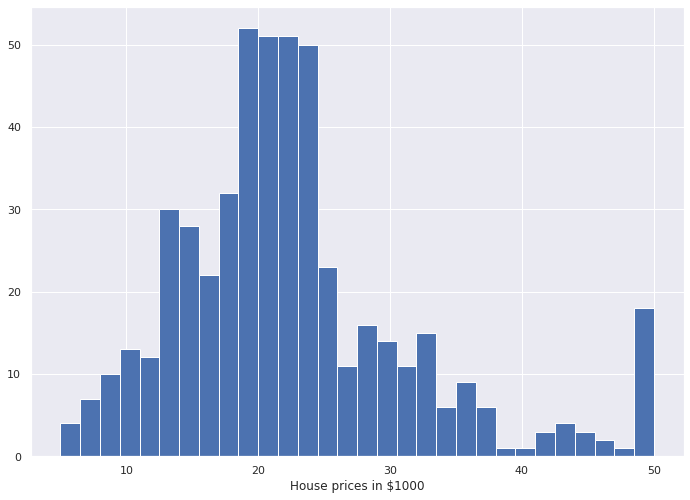

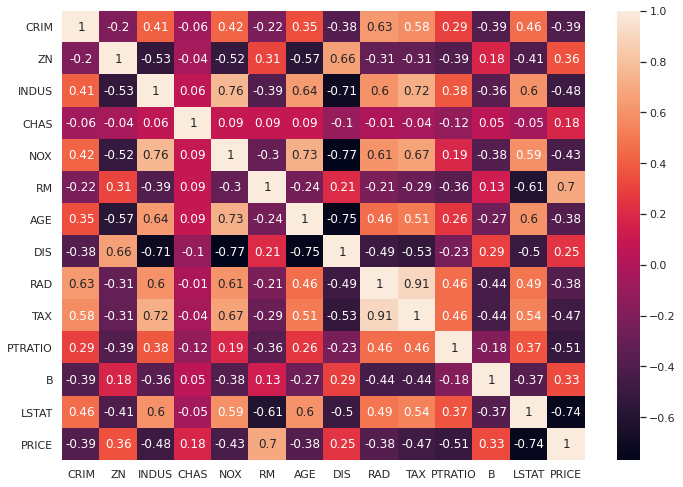

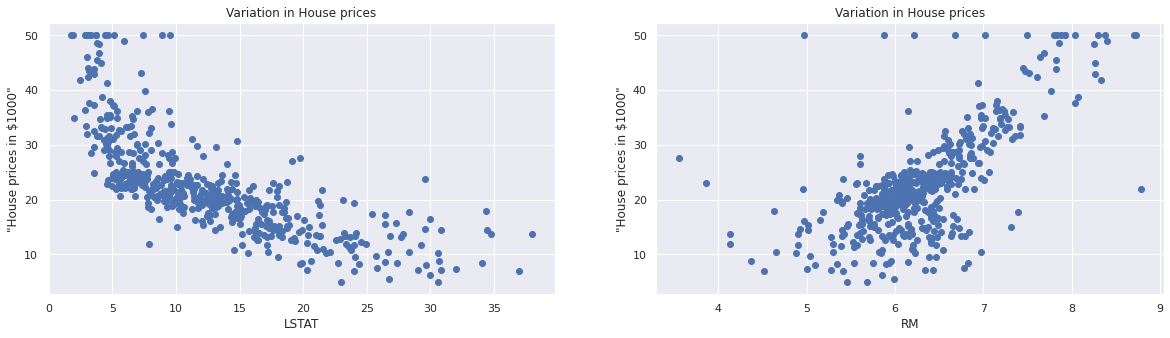

In [33]:
# Exploratory Data Analysis
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(bos['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

#bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names)

correlation_matrix = bos.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bos['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

(506, 1)
(506, 1)
(404, 1)
(102, 1)
(404, 1)
(102, 1)
The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.43


The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.895963186952216
R^2: 0.69




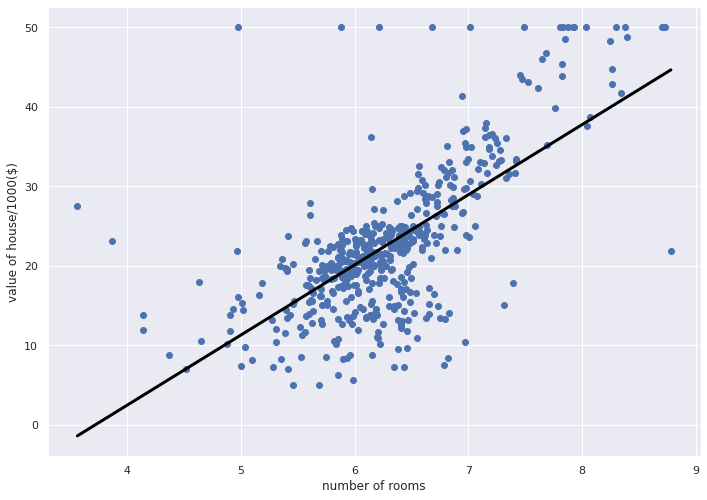

In [49]:
#Regression using RM as single variable b.c. of it's high positive correlation with PRICE
X_rooms = bos.RM
y_price = bos.PRICE

X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)
print(X_rooms.shape)
print(y_price.shape)

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)

print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

# Training
reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Test
y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

# Plotting the prediction
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 
plt.scatter(X_rooms,y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

In [50]:
# Now lets make a regression model using all variables, steps are nearly identical.

# Training
X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

# model evaluation for training set
y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Test
# Model evaluation for test set
y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75


The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.928602182665355
R^2: 0.67




Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

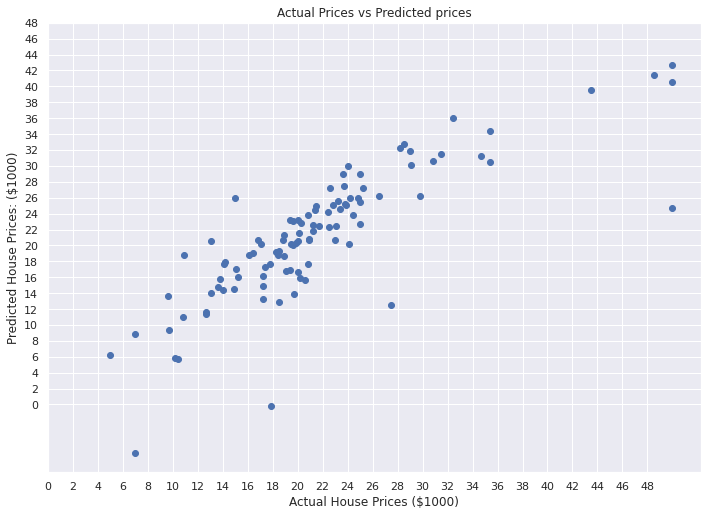

In [51]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.xticks(range(0, int(max(y_test)),2))
plt.yticks(range(0, int(max(y_test)),2))
plt.title("Actual Prices vs Predicted prices")